In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [3]:
def forward(x, y, x_n):
    arr = [y]
    for i in range(3):
        temp = []
        for j in range(0, len(arr[-1])-1):
            temp.append(arr[-1][j+1] - arr[-1][j])
        arr.append(temp)
    print(arr)

    h = (x_n - x[0]) / (x[1] - x[0])
    a = arr[0][0]
    b = h * arr[1][0]
    c = h * (h-1) / 2 * arr[2][0]
    d = h * (h-1) * (h-2) / 6 * arr[3][0]

    return a + b + c + d

[[1, 8, 27, 64], [7, 19, 37], [12, 18], [6]]


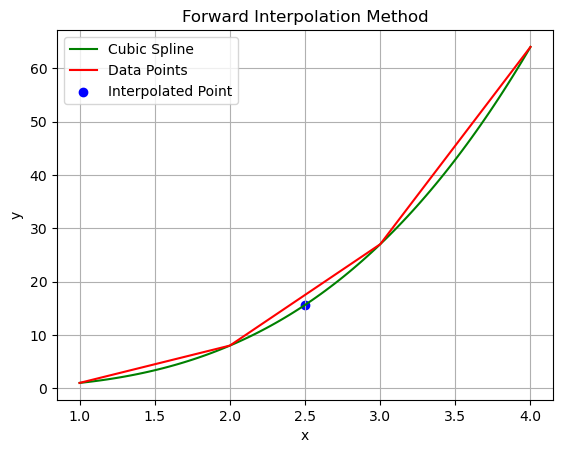

In [4]:
x = [1, 2,  3,  4]
y = [1, 8, 27, 64]
x_n = 2.5
y_n = forward(x, y, x_n)

x, y = np.array(x), np.array(y)
fn = interp1d(x, y, kind='cubic')
x_new = np.linspace(x.min(), x.max(), 100)
y_new = fn(x_new)

plt.plot(x_new, y_new, label='Cubic Spline', color='green')
plt.plot(x, y, color='red', label='Data Points')
plt.scatter(x_n, y_n, color='blue', label='Interpolated Point')
plt.title('Forward Interpolation Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()